Via https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions and https://aclanthology.org/D19-1613/

In [26]:
import pandas as pd
import numpy as np
import sys

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
import os
os.listdir()

['.ipynb_checkpoints',
 'CSC577 - Interim Report - MMohammed KRoy MWolff.pdf',
 'Final Project- Content Recs - Kunal-Copy1.ipynb',
 'Final Project- Content Recs - Kunal.ipynb',
 'Group3-Eval.pdf',
 'ingr_map.pkl',
 'interactions_test.csv',
 'interactions_train.csv',
 'interactions_validation.csv',
 'PP_recipes.csv',
 'PP_users.csv',
 'RAW_interactions.csv',
 'RAW_recipes.csv',
 'Recipes_Maggie_Collaborative_Filtering_Surprise.ipynb',
 'Recipes_Maggie_Neighborhood_models.ipynb',
 'recipe_meal_types.ipynb']

# Import Data

In [28]:
df_users = pd.read_csv('PP_users.csv')
print(df_users.shape)
print(df_users.u.nunique())
df_users.head(3)

(25076, 6)
25076


,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27


In [29]:
df_recipes = pd.read_csv('PP_recipes.csv')
print(df_recipes.shape)
print(df_recipes.id.nunique())
df_recipes.head(3)

(178265, 8)
178265


,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."


In [30]:
df_raw_recipes = pd.read_csv('RAW_recipes.csv')
print(df_raw_recipes.shape)
print(df_raw_recipes.id.nunique())
df_raw_recipes.head(3)

(231637, 12)
231637


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


In [31]:
df_interactions = pd.read_csv('RAW_interactions.csv')
print(df_interactions.shape)
print(df_interactions.user_id.nunique())
print(df_interactions.recipe_id.nunique())
df_interactions.head(3)

(1132367, 5)
226570
231637


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...


In [32]:
pickle = pd.read_pickle('ingr_map.pkl')
print(pickle.shape)
print(pickle.id.nunique())
pickle.head(3)

(11659, 7)
8023


,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308


# Exploratory Data Analysis

In [33]:
print(df_users.shape)
df_users.u.nunique()

(25076, 6)


25076

In [34]:
print(df_recipes.shape)
df_recipes.id.nunique()

(178265, 8)


178265

In [35]:
print(df_raw_recipes.shape)
df_raw_recipes.id.nunique()

(231637, 12)


231637

In [36]:
print(df_interactions.shape)
print(df_interactions.user_id.nunique())
print(df_interactions.recipe_id.nunique())

(1132367, 5)
226570
231637


In [37]:
print(pickle.shape)
pickle.id.nunique()

(11659, 7)


8023

## EDA Users

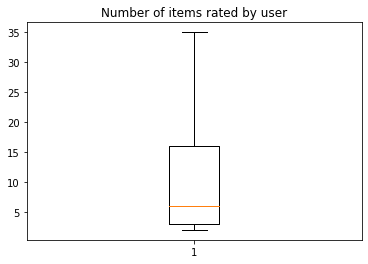

In [38]:
plt.boxplot(df_users['n_ratings'], showfliers=False);
plt.title('Number of items rated by user');

In [39]:
df_users.describe()

,u,n_items,n_ratings
count,25076.000000,25076.000000,25076.000000
mean,12537.500000,27.871311,27.871311
std,7238.962011,122.729039,122.729039
min,0.000000,2.000000,2.000000
25%,6268.750000,3.000000,3.000000
50%,12537.500000,6.000000,6.000000
75%,18806.250000,16.000000,16.000000
max,25075.000000,6437.000000,6437.000000


## EDA Interactions

In [40]:
df_interactions['rating'].value_counts(normalize=True)*100

5    72.093588
4    16.545872
0     5.373435
3     3.607929
2     1.247210
1     1.131965
Name: rating, dtype: float64

In [41]:
df_interactions['rating'].value_counts(normalize=False)

5    816364
4    187360
0     60847
3     40855
2     14123
1     12818
Name: rating, dtype: int64

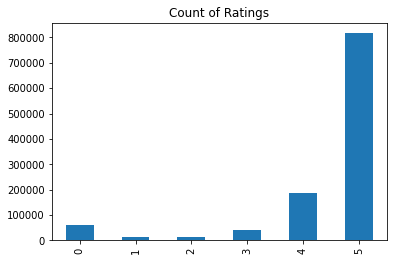

In [42]:
df_interactions['rating'].value_counts(sort=False).plot(kind='bar');
plt.title('Count of Ratings');

In [43]:
df_interactions['user_id'].value_counts().to_frame().describe()

,user_id
count,226570.000000
mean,4.997868
std,49.663111
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7671.000000


In [44]:
df_interactions.loc[df_interactions['rating']==0]

,user_id,recipe_id,date,rating,review
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
12,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...
23,681408,225241,2008-03-14,0,This is a very good recipe. We also want to c...
39,2002068522,29093,2018-03-26,0,i made it and it was amazing
56,980899,79222,2010-10-18,0,"I used half cream and half 1% milk, added anot..."
...,...,...,...,...,...
1132318,1197076,190261,2010-03-08,0,Delicious ! I tweeked the recipe a bit>>substi...
1132323,2405600,290157,2014-11-10,0,Just added this mix to a homemade beef &amp; s...
1132325,2000650711,290157,2017-04-10,0,Would this make a good hamburger patty seasoning?
1132361,102526,54493,2007-04-26,0,I am not going to rate this because I did have...


In [45]:
df_g_u = df_interactions['user_id'].value_counts().to_frame().reset_index()

percent1 = df_g_u.loc[df_g_u['user_id']==1].shape[0]/df_interactions['user_id'].value_counts().to_frame().shape[0]*100
print('percent of users that have rated only 1 recipe:', percent1,'%') 

percent25 = df_g_u.loc[df_g_u['user_id']>25].shape[0]/df_interactions['user_id'].value_counts().to_frame().shape[0]*100
print('percent of users that have rated at least 25 recipes:', percent25,'%') 

percent of users that have rated only 1 recipe: 73.37952950523017 %
percent of users that have rated at least 25 recipes: 2.310102837975019 %


In [46]:
df_g_i = df_interactions['recipe_id'].value_counts().to_frame().reset_index()

percent1 = df_g_i.loc[df_g_i['recipe_id']==1].shape[0]/df_interactions['recipe_id'].value_counts().to_frame().shape[0]*100
print('percent of recipes that have only 1 rating:', percent1,'%') 

percent25 = df_g_i.loc[df_g_i['recipe_id']>25].shape[0]/df_interactions['recipe_id'].value_counts().to_frame().shape[0]*100
print('percent of recipes that have at least 25 ratings:',percent25,'%') 

percent of recipes that have only 1 rating: 39.697025950085695 %
percent of recipes that have at least 25 ratings: 2.3942634380517793 %


## EDA Recipes

In [47]:
df_raw_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


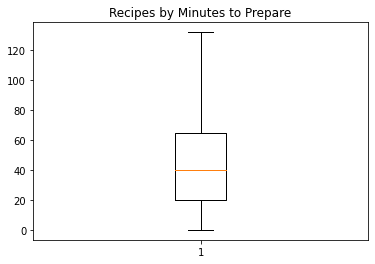

In [48]:
plt.boxplot(df_raw_recipes['minutes'], showfliers=False);
plt.title('Recipes by Minutes to Prepare');

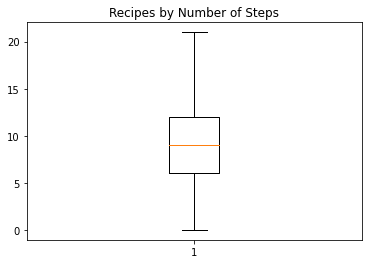

In [49]:
plt.boxplot(df_raw_recipes['n_steps'], showfliers=False);
plt.title('Recipes by Number of Steps');

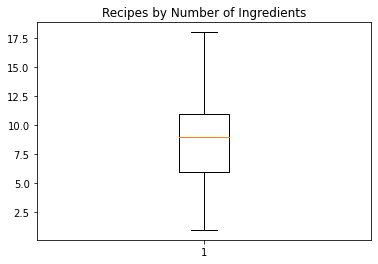

In [50]:
plt.boxplot(df_raw_recipes['n_ingredients'], showfliers=False);
plt.title('Recipes by Number of Ingredients');

In [51]:
pd.options.display.float_format = '{:20,.0f}'.format
df_raw_recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,"231,637","231,637","231,637","231,637","231,637"
mean,"222,015","9,399","5,534,885",10,9
std,"141,207","4,461,963","99,791,408",6,4
min,38,0,27,0,1
25%,"99,944",20,"56,905",6,6
50%,"207,249",40,"173,614",9,9
75%,"333,816",65,"398,275",12,11
max,"537,716","2,147,483,647","2,002,289,981",145,43


## EDA Ingredient Categories 

In [52]:
item_count = pickle.groupby('replaced')['count'].mean().to_frame().sort_values('count', ascending=False).reset_index()
item_count.head(10)

,replaced,count
0,salt,72848
1,butter,48039
2,egg,43350
3,onion,42631
4,sugar,37464
5,olive oil,34402
6,garlic clove,29815
7,water,28592
8,milk,24114
9,flmy,23078


In [53]:
item_count.describe()

,count
count,"8,023"
mean,219
std,"1,674"
min,2
25%,4
50%,11
75%,50
max,"72,848"


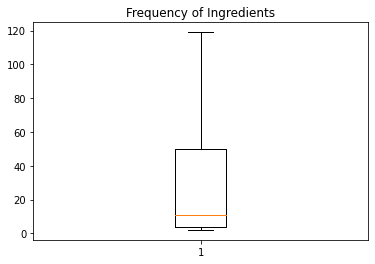

In [54]:
plt.boxplot(item_count['count'], showfliers=False);
plt.title('Frequency of Ingredients');

# Meal Categories

Code from Monica 

In [55]:
def tag_count(series):
    tag_counts = dict()
    for recipe_tags in series:
        recipe_tags = recipe_tags.strip('[]').replace("'", "").split(", ")
        for tag in recipe_tags:
            if tag not in tag_counts:
                tag_counts[tag] = 0
            else:
                tag_counts[tag] += 1
    return tag_counts
        

In [56]:
recipes = pd.read_csv('RAW_recipes.csv')
tag_count_totals = tag_count(recipes.tags)

In [57]:
tag_count_totals = pd.DataFrame({
    'tag': tag_count_totals.keys(),
    'freq': tag_count_totals.values()
})

In [58]:
len(tag_count_totals)

552

In [59]:
main_tags = [
    'main-dish', 
    'desserts', 
    'cakes', 
    'side-dishes', 
    'lunch', 
    'appetizers', 
    'brunch', 
    'beverages', 
    'snacks', 
    'sandwiches',
    'breakfast',
    'salads',
    'soup',
    'soups-stews'
    ]

others = [
    'pasta', 
    'condiments-etc', 
    'finger-food', 
    'sauces', 
    'pies-and-tarts', 
    'dips', 
    'pies', 
    'spreads', 
    'omelets-and-frittatas',
    'vegetables',
    'breads']

In [553]:
def assign_main_tag(x):
    recipe_tags = x.strip('[]').replace("'", "").split(", ")
    for tag in main_tags:
        if tag in recipe_tags:
            return tag
    else:
        for tag in others:
            if tag in recipe_tags:
                return tag

In [554]:
recipes['meal_type'] = recipes.tags.apply(assign_main_tag)

In [555]:
print('percent missing meal type:')
recipes.loc[recipes.meal_type.isnull()].shape[0]/recipes.shape[0]*100

percent missing meal type:


4.595984233952262

In [559]:
recipes['meal_type'].fillna('other', inplace=True)

In [561]:
recipes['meal_type'].value_counts()

main-dish         71786
desserts          43164
side-dishes       23293
lunch             13107
appetizers        12464
other             10646
beverages          9273
salads             7975
soups-stews        7934
condiments-etc     7674
breads             7490
brunch             7346
breakfast          5390
vegetables         2437
pasta               969
snacks              415
finger-food         274
Name: meal_type, dtype: int64

In [562]:
recipes['meal_type'].value_counts(normalize=True)

main-dish                        0.31
desserts                         0.19
side-dishes                      0.10
lunch                            0.06
appetizers                       0.05
other                            0.05
beverages                        0.04
salads                           0.03
soups-stews                      0.03
condiments-etc                   0.03
breads                           0.03
brunch                           0.03
breakfast                        0.02
vegetables                       0.01
pasta                            0.00
snacks                           0.00
finger-food                      0.00
Name: meal_type, dtype: float64

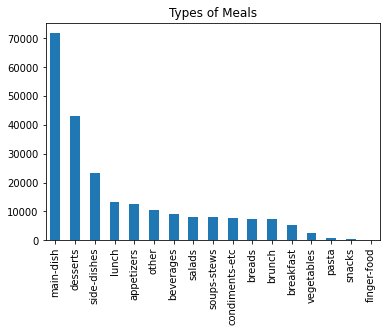

In [560]:
recipes['meal_type'].value_counts(sort=True).plot(kind='bar');
plt.title('Types of Meals');

# Ratings Data

In [65]:
#full dataset 
df_ratings = df_interactions[['user_id', 'recipe_id', 'rating']]
df_ratings.head()

,user_id,recipe_id,rating
0,38094,40893,4
1,1293707,40893,5
2,8937,44394,4
3,126440,85009,5
4,57222,85009,5


In [66]:
df_ratings.shape

(1132367, 3)

### Create smaller dataset to remove less active users and less popular recipes

In [67]:
#drop ratings of "0" since these might not reflect bad ratings 
df_ratings_drop0 = df_ratings[df_ratings['rating'] != 0]
df_ratings_drop0.shape

(1071520, 3)

In [68]:
# how many users have rated at least 25 recipes? 
df_g_u = df_ratings_drop0['user_id'].value_counts().to_frame().reset_index()
print(df_g_u.loc[df_g_u['user_id']>25].shape)

(5059, 2)


In [69]:
# how many recipes have rated at least 25 times? 
df_g_i = df_ratings_drop0['recipe_id'].value_counts().to_frame().reset_index()
print(df_g_i.loc[df_g_i['recipe_id']>25].shape)

(5141, 2)


In [70]:
%%time 

# keep only recipes with more than 25 ratings 
df_ratings2 = df_ratings_drop0[df_ratings_drop0.groupby('recipe_id').user_id.transform(len) > 25]
df_ratings2

Wall time: 1min 15s


,user_id,recipe_id,rating
278,1110776,78274,5
462,28649,33096,5
463,30298,33096,4
464,87300,33096,5
465,22973,33096,5
...,...,...,...
1132060,1803509170,55438,5
1132061,2141785,55438,5
1132063,2001355112,55438,5
1132064,2001608972,55438,5


In [71]:
%%time 

# keep only users with more than 25 ratings 
df_ratings3 = df_ratings2[df_ratings2.groupby('user_id').recipe_id.transform(len) > 25]
df_ratings3

Wall time: 28 s


,user_id,recipe_id,rating
462,28649,33096,5
465,22973,33096,5
466,37449,33096,5
467,89831,33096,5
468,101034,33096,5
...,...,...,...
1131805,2000431901,147458,4
1131846,86627,55438,5
1131852,107583,55438,5
1131853,281132,55438,5


In [72]:
df_ratings3['user_id'].value_counts()

140132    1440
126440     658
176615     626
173579     572
158086     479
          ... 
285867      26
209603      26
73706       26
344938      26
954555      26
Name: user_id, Length: 2089, dtype: int64

In [73]:
df_ratings3['recipe_id'].value_counts()

27208     412
89204     351
39087     314
22782     309
69173     302
         ... 
384905      1
393411      1
486496      1
501041      1
114360      1
Name: recipe_id, Length: 5102, dtype: int64

In [74]:
df_ratings3.shape

(133813, 3)

In [75]:
%%time 

# now that recipes have been removed, re-run again to keep only recipes with more than 5 ratings 
df_ratings4 = df_ratings3[df_ratings3.groupby('recipe_id').user_id.transform(len) > 5]
df_ratings4

Wall time: 1.41 s


,user_id,recipe_id,rating
462,28649,33096,5
465,22973,33096,5
466,37449,33096,5
467,89831,33096,5
468,101034,33096,5
...,...,...,...
1131735,535633,32541,5
1131736,173579,32541,5
1131740,216999,32541,5
1131741,107651,32541,4


In [76]:
df_ratings4['user_id'].value_counts()

140132    1431
126440     641
176615     624
173579     571
158086     478
          ... 
167527      25
242208      24
346221      23
954555      23
73951       23
Name: user_id, Length: 2089, dtype: int64

In [77]:
df_ratings4['recipe_id'].value_counts()

27208     412
89204     351
39087     314
22782     309
69173     302
         ... 
4042        6
160307      6
32987       6
14130       6
259393      6
Name: recipe_id, Length: 4841, dtype: int64

In [78]:
df_ratings4.groupby('user_id')['rating'].sum().to_frame().sort_values('rating').head()

,rating
user_id,
716215,73
314327,86
59921,100
603504,101
1250369,106


In [79]:
df_ratings.shape

(1132367, 3)

In [83]:
df_ratings4.shape

(132928, 3)

In [84]:
df_ratings4.shape[0]/df_ratings.shape[0]

0.11738950357966985

# Prepare data for Surprise package

In [85]:
from surprise import Dataset
from surprise import Reader

In [86]:
reader_recipes = Reader(rating_scale=(0, 5))

In [87]:
rateData = Dataset.load_from_df(df_ratings4[['user_id', 'recipe_id', 'rating']], reader_recipes)

In [131]:
rateData

# Surprise - neighborhood models 

In [89]:
from surprise import KNNWithMeans, KNNBasic, KNNWithZScore, KNNBaseline, SlopeOne 
from surprise import similarities, accuracy
from surprise.model_selection import cross_validate, KFold, ShuffleSplit, GridSearchCV
from time import time

In [196]:
k=10
min_k=5
cv=5
measures = ['RMSE', 'MSE', 'MAE']
models = (KNNWithMeans, KNNBasic, KNNWithZScore, KNNBaseline)
user_based = (True, False) 

In [209]:
%%time 

df = pd.DataFrame(columns = ['Model', 'User_Based', 'RMSE', 'MSE', 'MAE', 'Fit_Time', 'Test_Time'])

for m in models:
    for u in user_based:
                
        #t0 = time()

        sim_options = {"user_based": u}
        knn = m(k = k, min_k=min_k, sim_options=sim_options)
        cv_results = cross_validate(knn, rateData, measures=measures, cv=cv, verbose=False)

        #runtime = (time() - t0)
        
        df2 = pd.DataFrame([[str(m)[44:-2], 
                             u, 
                             cv_results['test_rmse'].mean(), 
                             cv_results['test_mse'].mean(), 
                             cv_results['test_mae'].mean(), 
                             np.array(cv_results['fit_time']).mean(),
                             np.array(cv_results['test_time']).mean()]], 
                             columns=['Model', 'User_Based', 'RMSE', 'MSE', 'MAE', 'Fit_Time', 'Test_Time'])
        df = df.append(df2)
        

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [210]:
#t0 = time()

so = SlopeOne()
cv_results = cross_validate(so, rateData, measures=measures, cv=cv, verbose=False)

#runtime = (time() - t0)
        
df2 = pd.DataFrame([[str(SlopeOne)[49:-2], 
                             None, 
                             cv_results['test_rmse'].mean(), 
                             cv_results['test_mse'].mean(), 
                             cv_results['test_mae'].mean(), 
                             np.array(cv_results['fit_time']).mean(),
                             np.array(cv_results['test_time']).mean()]], 
                           columns=['Model', 'User_Based', 'RMSE', 'MSE', 'MAE', 'Fit_Time', 'Test_Time'])
df = df.append(df2)

In [211]:
pd.options.display.float_format = '{:20,.4f}'.format
df

,Model,User_Based,RMSE,MSE,MAE,Fit_Time,Test_Time
0,KNNWithMeans,True,0.5579,0.3113,0.3532,0.6082,2.6381
0,KNNWithMeans,False,0.5675,0.3221,0.3607,1.9140,5.0236
0,KNNBasic,True,0.6015,0.3618,0.3696,0.5832,2.4392
0,KNNBasic,False,0.5723,0.3276,0.3463,2.0144,4.2008
0,KNNWithZScore,True,0.5649,0.3191,0.3489,0.8122,2.7461
0,KNNWithZScore,False,0.5754,0.3311,0.3574,2.2662,5.1555
0,KNNBaseline,True,0.5587,0.3121,0.3532,0.9630,2.7681
0,KNNBaseline,False,0.5603,0.3139,0.3502,2.0202,4.1436
0,SlopeOne,None,0.5688,0.3235,0.3604,1.7438,2.9611


In [212]:
df.sort_values('RMSE').head(3)

,Model,User_Based,RMSE,MSE,MAE,Fit_Time,Test_Time
0,KNNWithMeans,True,0.5579,0.3113,0.3532,0.6082,2.6381
0,KNNBaseline,True,0.5587,0.3121,0.3532,0.9630,2.7681
0,KNNBaseline,False,0.5603,0.3139,0.3502,2.0202,4.1436


In [213]:
df.sort_values('MSE').head(3)

,Model,User_Based,RMSE,MSE,MAE,Fit_Time,Test_Time
0,KNNWithMeans,True,0.5579,0.3113,0.3532,0.6082,2.6381
0,KNNBaseline,True,0.5587,0.3121,0.3532,0.9630,2.7681
0,KNNBaseline,False,0.5603,0.3139,0.3502,2.0202,4.1436


In [214]:
df.sort_values('MAE').head(3)

,Model,User_Based,RMSE,MSE,MAE,Fit_Time,Test_Time
0,KNNBasic,False,0.5723,0.3276,0.3463,2.0144,4.2008
0,KNNWithZScore,True,0.5649,0.3191,0.3489,0.8122,2.7461
0,KNNBaseline,False,0.5603,0.3139,0.3502,2.0202,4.1436


# Surprise - latent factor models

In [90]:
from surprise import SVD, SVDpp, NMF

In [152]:
cv=5
measures = ['RMSE', 'MSE', 'MAE']
models = (NMF, SVD, SVDpp)
bias = [True, False]

In [153]:
%%time 

df2 = pd.DataFrame(columns = ['Model', 'User_Based', 'RMSE', 'MSE', 'MAE', 'Fit_Time', 'Test_Time'])

for m in models:
    
    if str(m)[60:-2] == 'SVDpp':
        modelfit = m()
        cv_results = cross_validate(modelfit, rateData, measures=measures, cv=cv, verbose=False)

        runtime = (time() - t0)

        df3 = pd.DataFrame([[str(m)[60:-2], 
                             None,
                             cv_results['test_rmse'].mean(), 
                             cv_results['test_mse'].mean(), 
                             cv_results['test_mae'].mean(), 
                             np.array(cv_results['fit_time']).mean(),
                             np.array(cv_results['test_time']).mean()]], 
                           columns=['Model', 'User_Based', 'RMSE', 'MSE', 'MAE', 'Fit_Time', 'Test_Time'])
        df2 = df2.append(df3)
        
    else:        
        
        for b in bias: 

            t0 = time()

            modelfit = m(biased=b)
            cv_results = cross_validate(modelfit, rateData, measures=measures, cv=cv, verbose=False)

            runtime = (time() - t0)

            df3 = pd.DataFrame([[str(m)[60:-2], 
                                 b,
                                 cv_results['test_rmse'].mean(), 
                                 cv_results['test_mse'].mean(), 
                                 cv_results['test_mae'].mean(), 
                             np.array(cv_results['fit_time']).mean(),
                             np.array(cv_results['test_time']).mean()]], 
                           columns=['Model', 'User_Based', 'RMSE', 'MSE', 'MAE', 'Fit_Time', 'Test_Time'])
            df2 = df2.append(df3)
        

Wall time: 22min 7s


In [154]:
pd.options.display.float_format = '{:20,.4f}'.format
df2

,Model,User_Based,RMSE,MSE,MAE,Fit_Time,Test_Time
0,NMF,True,0.5490,0.3014,0.3582,12.8091,0.3830
0,NMF,False,0.6395,0.4090,0.5066,10.0449,0.2905
0,SVD,True,0.5512,0.3039,0.3526,8.2764,0.2691
0,SVD,False,0.6566,0.4312,0.5207,8.4423,0.2540
0,SVDpp,None,0.5482,0.3005,0.3481,218.3048,4.3317


In [155]:
df2.sort_values('RMSE')

,Model,User_Based,RMSE,MSE,MAE,Fit_Time,Test_Time
0,SVDpp,None,0.5482,0.3005,0.3481,218.3048,4.3317
0,NMF,True,0.5490,0.3014,0.3582,12.8091,0.3830
0,SVD,True,0.5512,0.3039,0.3526,8.2764,0.2691
0,NMF,False,0.6395,0.4090,0.5066,10.0449,0.2905
0,SVD,False,0.6566,0.4312,0.5207,8.4423,0.2540


In [156]:
df2.sort_values('MSE')

,Model,User_Based,RMSE,MSE,MAE,Fit_Time,Test_Time
0,SVDpp,None,0.5482,0.3005,0.3481,218.3048,4.3317
0,NMF,True,0.5490,0.3014,0.3582,12.8091,0.3830
0,SVD,True,0.5512,0.3039,0.3526,8.2764,0.2691
0,NMF,False,0.6395,0.4090,0.5066,10.0449,0.2905
0,SVD,False,0.6566,0.4312,0.5207,8.4423,0.2540


In [157]:
df2.sort_values('MAE')

,Model,User_Based,RMSE,MSE,MAE,Fit_Time,Test_Time
0,SVDpp,None,0.5482,0.3005,0.3481,218.3048,4.3317
0,SVD,True,0.5512,0.3039,0.3526,8.2764,0.2691
0,NMF,True,0.5490,0.3014,0.3582,12.8091,0.3830
0,NMF,False,0.6395,0.4090,0.5066,10.0449,0.2905
0,SVD,False,0.6566,0.4312,0.5207,8.4423,0.2540


# Compare top models

In [99]:
df.sort_values('MAE')

,Model,User_Based,RMSE,MSE,MAE,Runtime
0,KNNBasic,False,0.5720,0.3272,0.3465,27.4603
0,KNNWithZScore,True,0.5652,0.3195,0.3492,15.7718
0,KNNBaseline,False,0.5594,0.3130,0.3508,73.4879
0,KNNWithMeans,True,0.5581,0.3115,0.3530,14.7250
0,KNNBaseline,True,0.5601,0.3138,0.3546,21.5976
0,KNNWithZScore,False,0.5748,0.3304,0.3577,35.1474
0,SlopeOne,None,0.5675,0.3221,0.3593,39.9314
0,KNNWithMeans,False,0.5675,0.3221,0.3605,29.2383
0,KNNBasic,True,0.6016,0.3620,0.3705,14.0483


In [100]:
df2.sort_values('MAE')

,Model,Biased,RMSE,MSE,MAE,Runtime
0,SVDpp,None,0.5476,0.2999,0.3484,"1,175.3110"
0,SVD,True,0.5503,0.3029,0.3519,50.9685
0,NMF,True,0.5486,0.3010,0.3582,75.3300
0,NMF,False,0.6363,0.4049,0.5027,85.2897
0,SVD,False,0.6586,0.4338,0.5231,51.5645


The neighborhood models performend similarly. 
- KNNBasic item-based performed best on MAE and had a relatively average runtime compared to other KNN models 
- KNNWithMeans user-based performed best on RMSE/MSE and had the second quickest runtime. 

Latent-factor (matrix factorization) models also performed similarly. 
- SVDpp performed best on MAE, however, it had a significantly longer runtime
- SVD with Biased=True was very close on MAE and better on RMSE wtih a shorter runtime

Optimize for MAE because we don't need to worry about outliers - all ratings are 1-5. 


# Parameter Optimization

##### KNN Basic item-based

In [101]:
# use GridSearch to find best distance metric 

t0 = time()

sim_options = {
    "name": ["pearson", "cosine", "msd"],
    "user_based": [False],
}

cv = KFold(n_splits = 5, random_state = 22)

param_grid = {'k': list(range(10,35,5)),
              'sim_options': sim_options}

gs_knn = GridSearchCV(KNNBasic, param_grid, measures=["mae"], cv=cv)
gs_knn.fit(rateData)

print("done in %0.3fs." % (time() - t0))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the ms

In [102]:
pd.set_option('max_colwidth', 100)

df_knn = pd.DataFrame.from_dict(gs_knn.cv_results)
cols = ['params', 'mean_test_mae']
df_knn[cols].sort_values('mean_test_mae').head(5)

,params,mean_test_mae
5,"{'k': 15, 'sim_options': {'name': 'msd', 'user_based': False}}",0.3452
8,"{'k': 20, 'sim_options': {'name': 'msd', 'user_based': False}}",0.3455
11,"{'k': 25, 'sim_options': {'name': 'msd', 'user_based': False}}",0.3456
14,"{'k': 30, 'sim_options': {'name': 'msd', 'user_based': False}}",0.3457
2,"{'k': 10, 'sim_options': {'name': 'msd', 'user_based': False}}",0.3459


In [103]:
# find optimal k for KNNBasic, item based, with msd as similiarit metric 

def find_opt_k(minK, maxK, step, cv, data, sim_measure, user_based, acc_measure1, acc_measure2, model):
    '''find optimal number of K neighbors'''
    
    mean_arr = np.array([])
    k_range = list(range(minK, maxK+1, step))

    for k in k_range:
        # item-based KNN with cosine similarity
        sim_options = {
            "name": sim_measure,
            "user_based": user_based,   
        }
        alg = model(k=k, sim_options=sim_options)

        # 5-fold cross-validation 
        cv_results_item = cross_validate(alg, data, measures=[acc_measure1], cv=cv, verbose=False) 
    
        # find mean of accuracy measure
        mean_acc = cv_results_item[acc_measure2].mean()
        
        if mean_arr.shape[0] == 0:
            mean_arr = np.append(mean_arr, [mean_acc])
        else:
            mean_arr = np.vstack((mean_arr, mean_acc))

    return mean_arr

In [104]:
%%time 

minK = 5
maxK = 35
step = 2
cv = 5 
sim_measure = "msd"
user_based = False
acc_measure1 = "MAE"
acc_measure2 = "test_mae"
model = KNNBasic

mean_MAE = find_opt_k(minK, maxK, step, cv, rateData, sim_measure, user_based, acc_measure1, acc_measure2, model)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

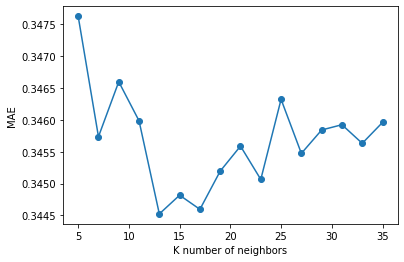

In [105]:
k_neigh = np.arange(minK,maxK+1,step)
k_neigh.shape
plt.plot(k_neigh, mean_MAE, marker='o');
plt.xlabel('K number of neighbors');
plt.ylabel(acc_measure1);

In [106]:
k_neigh[np.argmin(mean_MAE)]

13

In [160]:
# optimal KNN model 

sim_measure = "msd"
user_based = False
acc_measure1 = "MAE"
acc_measure2 = "test_mae"
model = KNNBasic
k = 13

t0 = time()

sim_options = {
    "name": sim_measure,
    "user_based": user_based,  
}
knn = model(k=k, min_k=k, sim_options=sim_options)
cv_results_knn = cross_validate(knn, rateData, measures=[acc_measure1], cv=5, verbose=True)

print("done in %0.3fs." % (time() - t0))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.3538  0.3567  0.3518  0.3534  0.3582  0.3548  0.0023  
Fit time          1.98    1.72    1.97    1.51    1.62    1.76    0.19    
Test time         4.15    4.27    3.82    3.71    3.70    3.93    0.24    
done in 29.970s.


In [161]:
cv_results_knn[acc_measure2].mean()

0.35476628751040323

# Parameter Optimization

##### SVD

In [109]:
# use GridSearch to find best parameters 

t0 = time()

cv = KFold(n_splits = 5, random_state = 22)


param_grid = {"n_factors": [50, 100],
                "n_epochs": [10, 20],
                "biased": [True, False],
                "lr_all": [0.0005, 0.005, 0.05], 
                "reg_all": [0.002, 0.02, 0.2]
              }


gs_svd = GridSearchCV(SVD, param_grid, measures=["mae"], cv=cv)
gs_svd.fit(rateData)

print("done in %0.3fs." % (time() - t0))

done in 1996.456s.


In [110]:
pd.options.display.float_format = '{:20,.4f}'.format

df_svd = pd.DataFrame.from_dict(gs_svd.cv_results)
cols = ['params', 'mean_test_mae']
df_svd[cols].sort_values('mean_test_mae').head(5)

,params,mean_test_mae
22,"{'n_factors': 50, 'n_epochs': 20, 'biased': True, 'lr_all': 0.005, 'reg_all': 0.02}",0.3495
21,"{'n_factors': 50, 'n_epochs': 20, 'biased': True, 'lr_all': 0.005, 'reg_all': 0.002}",0.3507
58,"{'n_factors': 100, 'n_epochs': 20, 'biased': True, 'lr_all': 0.005, 'reg_all': 0.02}",0.3526
3,"{'n_factors': 50, 'n_epochs': 10, 'biased': True, 'lr_all': 0.005, 'reg_all': 0.002}",0.3527
4,"{'n_factors': 50, 'n_epochs': 10, 'biased': True, 'lr_all': 0.005, 'reg_all': 0.02}",0.3528


In [111]:
# Optimal SVD model  

t0 = time()

svd = SVD(n_factors=50, n_epochs=20, biased=True, lr_all=0.005, reg_all=0.02)
cv_results_SVD = cross_validate(svd, rateData, measures=['MAE'], cv=5, verbose=True)

print("done in %0.3fs." % (time() - t0))

Evaluating MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.3509  0.3409  0.3508  0.3540  0.3492  0.3491  0.0044  
Fit time          5.11    5.04    5.54    5.36    5.53    5.31    0.21    
Test time         0.36    0.34    0.25    0.43    0.26    0.33    0.06    
done in 29.762s.


In [112]:
cv_results_SVD['test_mae'].mean()

0.34914366672819386

# Generate Predictions  

# Recommender Functions

In [507]:
def get_recipe_names(recipe_df, col_name, col_type, col_id):
    '''returns recipe names by index'''
    
    recipe_array_names = np.array(recipe_df[col_name])
    recipe_array_types = np.array(recipe_df[col_type])
    recipe_array_ids = np.array(recipe_df[col_id])
    
    return recipe_array_names, recipe_array_types, recipe_array_ids

In [508]:
def get_rated_items(user, ratings_df, train_df, UID, RID, rate_col):
    '''return an array of the rated items by user and an array of the ratings'''
    
    # get items rated by user by recipe_id
    rated_items_by_user = np.array(ratings_df.loc[ratings_df[UID]==user][RID])
    
    # get ratings
    ratings = np.array(ratings_df.loc[ratings_df[UID]==user][rate_col])
    
    # convert to trainset indicies
    rated_items2 = np.empty((rated_items_by_user.shape[0],))
    number_of_items = rated_items_by_user.shape[0]

    for i in range(0, number_of_items):
        rated_items2[i] = int(train_df.to_inner_iid(rated_items_by_user[i]))
        
    return rated_items2

In [509]:
def get_top_rated_recipes(rating_df, UID, user, rate_col, RID, recipe_df, recipe_col_name, recipe_col_type, recipe_col_id):
    '''returns names, types, and ratings of recipes with above-average ratings for that user'''
    
    # average rating by user
    avg_rating = rating_df.loc[rating_df[UID]==user][rate_col].mean()

    # get list of recipe IDs sorted by rating 
    user_ratings = rating_df.loc[rating_df[UID]==user].sort_values(rate_col, ascending=False)

    # liked recipes - rating above average 
    liked_recipes = user_ratings.loc[user_ratings[rate_col] > avg_rating]
    top_rated_recipe_ids = np.array(liked_recipes[RID])
    top_rated_recipe_ratings = np.array(liked_recipes[rate_col])
    
    # get list of recipe names and corresponding indices 
    recipe_array_names, recipe_array_types, recipe_array_ids = get_recipe_names(recipe_df, recipe_col_name, recipe_col_type, recipe_col_id)
    
    # get list of recipe indices sorted by rating 
    top_rated_indx = np.where(np.in1d(recipe_array_ids, top_rated_recipe_ids))

    # get list of top N recipes by name
    recipe_names = recipe_array_names[top_rated_indx]
    
    # get list of types of top N recipes
    recipe_types = recipe_array_types[top_rated_indx]
    
    return recipe_names, recipe_types, top_rated_recipe_ratings 

In [510]:
def get_user_predictions(user, train_df, model):
    '''return predicted ratings for a user'''
        
    # get predicted ratings for all recipes for target user 
    ratings = np.empty((train_df.n_items,))
    for i in train_df.all_items():
        ratings[i] = model.predict(uid=train_df.to_inner_uid(user), iid=i).est
        
    # sort indexes of predicted ratings 
    rate_sort_indx = np.argsort(ratings)[::-1]
    
    # sort predicted ratings 
    rate_sort = np.sort(ratings)[::-1]    
        
    return rate_sort_indx, rate_sort 

In [511]:
def generate_user_recommendations(user, ratings_df, train_df, UID, RID, N, model, rate_col):
    '''return top N recommended items for a user'''
    
    # generate predictions
    rate_sort_indx, rate_sort = get_user_predictions(user, train_df, model)
    
    # remove already rated items 
    rated_items_inner = get_rated_items(user, ratings_df, train_df, UID, RID, rate_col)
    recs_inner = np.array([i for i in rate_sort_indx if i not in rated_items_inner])
    
    # get original recipe_id
    recs_orig = np.empty((recs_inner.shape[0],))
    number_of_recs = recs_inner.shape[0]

    for i in range(0, number_of_recs):
        recs_orig[i] = train_df.to_raw_iid(recs_inner[i])
    
    return recs_orig[0:N], rate_sort[0:N]

In [512]:
def get_top_predicted_recipes(user, rating_df, train_df, UID, RID, rate_col, 
                              recipe_df, recipe_col_name, recipe_col_type, recipe_col_id, N, model):
    '''returns names of top N recommended recipes'''
    
    # get list of recipe IDs sorted by recommendation  
    recs_indx, rate_sort = generate_user_recommendations(user, rating_df, train_df, UID, RID, N, model, rate_col)
    
    # get list of recipe names and corresponding indices 
    recipe_array_names, recipe_array_types, recipe_array_ids = get_recipe_names(recipe_df, recipe_col_name, recipe_col_type, recipe_col_id)
    
    # get list of recipe indices sorted by predicted rating 
    top_pred_indx = np.where(np.in1d(recipe_array_ids, recs_indx))

    # get list of top N recipes by name
    recipe_names = recipe_array_names[top_pred_indx]
    
    # get list of types of top N recipes 
    recipe_types = recipe_array_types[top_pred_indx]
    
    return recipe_names, recipe_types, rate_sort  

In [513]:
def recipe_recommender(user, ratings_df, train_df, recipes_df, 
                       UID, RID, rate_col, recipe_col_name, recipe_col_type, recipe_col_id, N, model):
    '''created dataframe with above average rated recipes and top N recommended recipes for a user'''
        
    # get top rated recipes 
    recipe_names_rated, recipe_types_rated, top_rated_recipe_ratings = get_top_rated_recipes(ratings_df, UID, user, 
                                     rate_col, RID, recipes_df, recipe_col_name, recipe_col_type, recipe_col_id)
    
    # get recommended recipes
    recipe_names_rec, recipe_types_rec, rate_sort_rec = get_top_predicted_recipes(user, ratings_df, trainset, UID, RID, 
                                     rate_col, recipes_df, recipe_col_name, recipe_col_type, recipe_col_id, N, model)
    
        
    #format into dataframes 
    df_rated1 = pd.DataFrame(recipe_names_rated, columns = ['Name'])
    df_rated2 = pd.DataFrame(recipe_types_rated, columns = ['Type'])
    df_rated3 = pd.DataFrame(top_rated_recipe_ratings, columns = ['Ratings'])
    df_temp1 = df_rated1.join(df_rated2)
    df_rated = df_temp1.join(df_rated3)
    df_rated

    df_pred1 = pd.DataFrame(recipe_names_rec, columns = ['Name'])
    df_pred2 = pd.DataFrame(recipe_types_rec, columns = ['Type'])
    df_pred3 = pd.DataFrame(rate_sort_rec, columns = ['Ratings'])
    df_temp1 = df_pred1.join(df_pred2)
    df_preds = df_temp1.join(df_pred3)

    return df_rated, df_preds    

In [514]:
#users wtih the fewest ratings
df_ratings4.groupby('user_id')['rating'].sum().to_frame().sort_values('rating').head()

,rating
user_id,
716215,73
314327,86
59921,100
603504,101
1250369,106


In [515]:
#users with the most ratings 
df_ratings4.groupby('user_id')['rating'].sum().to_frame().sort_values('rating').tail()

,rating
user_id,
158086,2346
173579,2813
176615,3094
126440,3132
140132,6765


In [516]:
trainset = rateData.build_full_trainset()

In [517]:
# optimal SVD

svd = SVD(n_factors=50, n_epochs=20, biased=True, lr_all=0.005, reg_all=0.02)
svd.fit(trainset)

In [518]:
# optimal KNN model 

sim_options = {"name": "msd", "user_based": False}
knn = KNNBasic(k=13, min_k=13, sim_options=sim_options)
knn.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


# Generate Predictions

In [519]:
N = 10
model = svd
user = 716215

df_rated, df_preds = recipe_recommender(user, df_ratings4, trainset, recipes, 
                   'user_id', 'recipe_id', 'rating', 'name', 'meal_type', 'id', N, model)

In [520]:
print('10 of the top', df_rated.shape[0], 'recipes rated by user', user,':')
pd.options.display.float_format = '{:20,.0f}'.format
df_rated.head(10)

10 of the top 14 recipes rated by user 716215 :


,Name,Type,Ratings
0,awesome blueberry muffins,lunch,5
1,bacon and lettuce stuffed cherry tomatoes,side-dishes,5
2,beer n bbq braised country style pork ribs,main-dish,5
3,chicken pesto,main-dish,4
4,clam chowder stew,main-dish,4
5,creamy cajun chicken pasta,main-dish,4
6,mashed red potatoes with garlic and parmesan,side-dishes,3
7,microwave poached egg on toast,breakfast,3
8,mini tacos,main-dish,3
9,pork chops yum yum,main-dish,3


In [521]:
print('Top', df_rated.shape[0], 'recipes rated by user', user,'\n by % of meal type:')
pd.options.display.float_format = '{:20,.2f}'.format
(df_rated['Type'].value_counts(normalize=True)*100).to_frame()

Top 14 recipes rated by user 716215 
 by % of meal type:


,Type
main-dish,61.54
side-dishes,15.38
breakfast,7.69
lunch,7.69
soups-stews,7.69


In [522]:
print('Top', N, 'recommended recipes:')
pd.options.display.float_format = '{:20,.2f}'.format
df_preds

Top 10 recommended recipes:


,Name,Type,Ratings
0,3 packet roast,main-dish,4.94
1,50 whole wheat bread,breads,4.93
2,baby pacifiers shower favors,None,4.92
3,delicious corn muffins,vegetables,4.92
4,grilled balsamic asparagus,side-dishes,4.91
5,grilled pork chops marinade,main-dish,4.90
6,key west key lime cake,desserts,4.90
7,lawry s taco spices seasoning mix by todd wi...,condiments-etc,4.89
8,melt in your mouth pumpkin bread,lunch,4.89
9,sticky soy wings,appetizers,4.89


In [523]:
user = 173579

df_rated, df_preds = recipe_recommender(user, df_ratings4, trainset, recipes, 
                   'user_id', 'recipe_id', 'rating', 'name', 'meal_type', 'id', N, model)

In [524]:
print('10 of the top', df_rated.shape[0], 'recipes rated by user', user,':')
pd.options.display.float_format = '{:20,.0f}'.format
df_rated.head(10)

10 of the top 535 recipes rated by user 173579 :


,Name,Type,Ratings
0,ant kelly s london broil marinade,None,5
1,kelly s creamy cheddar pea salad,side-dishes,5
2,swiss round steak with onion gravy,main-dish,5
3,panera bread black bean soup,main-dish,5
4,1 pan fudge cake,desserts,5
5,24k carrots,side-dishes,5
6,30 minute cheesy baked ravioli,main-dish,5
7,4 minute spicy garlic shrimp,main-dish,5
8,4th of july grilled salmon or chicken,main-dish,5
9,55 house salad,brunch,5


In [525]:
print('Top', N, 'recommended recipes for user', user,':')
pd.options.display.float_format = '{:20,.2f}'.format
df_preds

Top 10 recommended recipes for user 173579 :


,Name,Type,Ratings
0,3 packet roast,main-dish,4.94
1,50 whole wheat bread,breads,4.93
2,baby pacifiers shower favors,None,4.92
3,grilled balsamic asparagus,side-dishes,4.92
4,grilled pork chops marinade,main-dish,4.91
5,key west key lime cake,desserts,4.90
6,kittencal s strawberry shortcake,desserts,4.90
7,lawry s taco spices seasoning mix by todd wi...,condiments-etc,4.89
8,melt in your mouth pumpkin bread,lunch,4.89
9,sticky soy wings,appetizers,4.89


In [526]:
user = 314327

df_rated, df_preds = recipe_recommender(user, 
                    df_ratings4, trainset, recipes, 
                   'user_id', 'recipe_id', 'rating', 'name', 'meal_type', 'id', N, model)

In [527]:
print('10 of the top', df_rated.shape[0], 'recipes rated by user', user,':')
pd.options.display.float_format = '{:20,.0f}'.format
df_rated.head(10)

10 of the top 16 recipes rated by user 314327 :


,Name,Type,Ratings
0,anasazi enchiladas,main-dish,5
1,banana banana bread,breads,5
2,buttermilk pancakes,breakfast,5
3,carne guisada mexican beef stew,main-dish,5
4,carrabba s house salad dressing creamy parmes...,salads,5
5,crock pot chicken with black beans cream cheese,main-dish,5
6,lasagna soup,main-dish,4
7,most incredible no fail pie crust,desserts,4
8,ooey gooey cinnamon rolls,breads,4
9,outback steakhouse style steak,main-dish,4


In [528]:
print('Top', N, 'recommended recipes:')
pd.options.display.float_format = '{:20,.2f}'.format
df_preds

Top 10 recommended recipes:


,Name,Type,Ratings
0,3 packet roast,main-dish,4.94
1,50 whole wheat bread,breads,4.93
2,baby pacifiers shower favors,None,4.92
3,delicious corn muffins,vegetables,4.92
4,grilled balsamic asparagus,side-dishes,4.91
5,grilled pork chops marinade,main-dish,4.90
6,key west key lime cake,desserts,4.90
7,lawry s taco spices seasoning mix by todd wi...,condiments-etc,4.89
8,melt in your mouth pumpkin bread,lunch,4.89
9,sticky soy wings,appetizers,4.89


In [529]:
user = 20480

df_rated, df_preds = recipe_recommender(user, 
                    df_ratings4, trainset, recipes, 
                   'user_id', 'recipe_id', 'rating', 'name', 'meal_type', 'id', N, model)

In [530]:
print('10 of the top', df_rated.shape[0], 'recipes rated by user', user,':')
pd.options.display.float_format = '{:20,.0f}'.format
df_rated.head(10)

10 of the top 114 recipes rated by user 20480 :


,Name,Type,Ratings
0,land of nod cinnamon buns,breakfast,5
1,100 whole wheat bread bread machine,breads,5
2,24k carrots,side-dishes,5
3,55 house salad,brunch,5
4,african banana coconut bake,desserts,5
5,antipasto wraps,lunch,5
6,awesome pan fried potatoes,side-dishes,5
7,baked ziti from cook s illustrated,main-dish,5
8,balsamic asparagus,side-dishes,5
9,balsamic chicken thighs,main-dish,5


In [531]:
print('Top', N, 'recommended recipes:')
pd.options.display.float_format = '{:20,.2f}'.format
df_preds

Top 10 recommended recipes:


,Name,Type,Ratings
0,3 packet roast,main-dish,4.94
1,50 whole wheat bread,breads,4.93
2,baby pacifiers shower favors,None,4.92
3,delicious corn muffins,vegetables,4.92
4,grilled balsamic asparagus,side-dishes,4.91
5,grilled pork chops marinade,main-dish,4.90
6,key west key lime cake,desserts,4.90
7,lawry s taco spices seasoning mix by todd wi...,condiments-etc,4.89
8,melt in your mouth pumpkin bread,lunch,4.89
9,sticky soy wings,appetizers,4.89


In [532]:
user = 176615

df_rated, df_preds = recipe_recommender(user, 
                    df_ratings4, trainset, recipes, 
                   'user_id', 'recipe_id', 'rating', 'name', 'meal_type', 'id', N, model)

In [533]:
print('10 of the top', df_rated.shape[0], 'recipes rated by user', user,':')
pd.options.display.float_format = '{:20,.0f}'.format
df_rated.head(10)

10 of the top 602 recipes rated by user 176615 :


,Name,Type,Ratings
0,land of nod cinnamon buns,breakfast,5
1,never weep whipped cream,condiments-etc,5
2,whatever floats your boat brownies,desserts,5
3,1 2 3 apple crisp,desserts,5
4,1 hour ham and bean soup,main-dish,5
5,100 whole wheat blueberry muffins,lunch,5
6,24k carrots,side-dishes,5
7,30 minute cheesy baked ravioli,main-dish,5
8,40 minute hamburger buns,breads,5
9,allrighty then scrambled eggs paula deen,brunch,5


In [534]:
print('Top', N, 'recommended recipes:')
pd.options.display.float_format = '{:20,.2f}'.format
df_preds

Top 10 recommended recipes:


,Name,Type,Ratings
0,3 packet roast,main-dish,4.94
1,50 whole wheat bread,breads,4.93
2,baby pacifiers shower favors,None,4.92
3,grilled balsamic asparagus,side-dishes,4.92
4,grilled pork chops marinade,main-dish,4.91
5,key west key lime cake,desserts,4.90
6,kittencal s strawberry shortcake,desserts,4.90
7,lawry s taco spices seasoning mix by todd wi...,condiments-etc,4.89
8,melt in your mouth pumpkin bread,lunch,4.89
9,sticky soy wings,appetizers,4.89
